In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df=pd.read_csv('amazon.csv')

In [8]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [12]:
df['product_id']=='B002SZEOLG'

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: product_id, Length: 1465, dtype: bool

In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
df.shape

(1465, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [14]:
#converting object types into float
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [16]:
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [18]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [20]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [13]:
df.query('rating=="|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [22]:
# The rating of 1297 is missing .. In actaul website the rating of the product is 4 so we replace the symbol as 4
df['rating']=df['rating'].str.replace('|','4.0').astype('float64')

In [15]:
df.query('rating==4.0')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,299.0,0.33,4.0,"43,994",Universal Compatibility – It is compatible wit...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
17,B082LSVT4B,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,249.00,399.0,0.38,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/I/41d84o5-M-...,https://www.amazon.in/Ambrane-Unbreakable-Char...
23,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,59.00,199.0,0.70,4.0,"9,378","Micro usb cable is 1 meter in length, optimize...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31qGpf8uzu...,https://www.amazon.in/Flix-Micro-Cable-Smartph...
27,B094JNXNPV,Ambrane Unbreakable 3 in 1 Fast Charging Braid...,Computers&Accessories|Accessories&Peripherals|...,299.00,399.0,0.25,4.0,"2,766",Blazing Charging - All combined 3 in 1 cable s...,"AFYR53OTBUX2RNAKUZHUJ4RFJJNQ,AHR735YWWYFTQI5VG...","Anand sarma,lokeshnist,C,SAI KIRAN,Amazon Cust...","R249YCZVKYR5XD,R1GHL3EYAQ4ZMT,R1M0NVGZXK8NGO,R...","Ok cable,three pin with hybrid wire,Sturdy,Nic...",The product seems and works good but it's not ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,B09MFR93KS,"Bajaj Rex DLX 750 W 4 Jars Mixer Grinder, Whit...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,3041.67,5999.0,0.49,4.0,777,"Powerful motor - 2000 RPM, 750 Watts|4 Stainle...","AHHBMYHNLEWTUVSATQ2JSLH6N7LQ,AGIBUV2VEAGMLKIAC...","Ashish Mishra,PREM SINGH,Manoranjan Behera,Anu...","R3JBAT4PI4PLO0,R3PJIYCNWQ8Y2L,RWBQ359RY77PV,R1...","Good product,Best product,not that much good,B...","Nice product,Go for it.Best mixer at this pric...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-Jars-Mixer-Grinder...
1435,B089BDBDGM,Kuber Industries Waterproof Round Laundry Bag/...,Home&Kitchen|HomeStorage&Organization|LaundryO...,219.00,249.0,0.12,4.0,"1,108",PACKAGE CONTAIN: 1 Piece Laundry Basket|MATERI...,"AEBNUYHIR7GVMMLJXH5ONPDIJF7Q,AGPI7NG4ZSTCPPICR...","Vamsi,SASWATA CHAKRABORTY,nikitha.m bangre,Mad...","R3E5WJVPAKKEF1,R35VC2K2S2FQGC,R1AIDBLOPDFHFK,R...","Worth Buying,Utility product,Good one,Average,...",If you are not

In [24]:
df['rating_count']=df['rating_count'].str.replace(',','').astype('float64')

In [30]:
#Checking for duplicates
duplicate=df.duplicated()
df[duplicate]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [18]:
#Checking for missing value
#df.isna().sum()
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [19]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [32]:
#Creating new data frame with selected column
df1=df[['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [21]:
df1.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0


In [22]:
df['category']

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object

In [34]:
#splitting the strings in the catogory column a|b = a ,b
catsplit=df['category'].str.split('|',expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [36]:
#Renaming category column
catsplit=catsplit.rename(columns={0:'category_1',1:'category_2',2:'category_3'})

In [25]:
catsplit.head(2)

,category_1,category_2,category_3,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [38]:
#adding category in new data frame
df1['category_1']=catsplit['category_1']
df1['category_2']=catsplit['category_2']

df1.drop(columns='category',inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [27]:
#checking category_1 unique value
df1['category_1'].value_counts()

category_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [40]:
#Fixing strings in category_1 column
df1['category_1']=df1['category_1'].str.replace('&',' & ')
df1['category_1']=df1['category_1'].str.replace('OfficeProducts','Office Products')
df1['category_1']=df1['category_1'].str.replace('MusicalInstruments','Musical Instruments')
df1['category_1']=df1['category_1'].str.replace('HomeImprovement','Home Improvement')

In [29]:
df1['category_1'].value_counts()

category_1
Electronics                526
Computers & Accessories    453
Home & Kitchen             448
Office Products             31
Musical Instruments          2
Home Improvement             2
Toys & Games                 1
Car & Motorbike              1
Health & PersonalCare        1
Name: count, dtype: int64

In [30]:
#Cheching category_2
df1['category_2'].value_counts()

category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Mi

In [42]:
#correcting the values
df1['category_2']=df1['category_2'].str.replace('&',' & ')
df1['category_2']=df1['category_2'].str.replace(',',', ')
df1['category_2']=df1['category_2'].str.replace('HomeAppliances','Home Appliances')
df1['category_2']=df1['category_2'].str.replace('HomeTheater','Home Theater')
df1['category_2']=df1['category_2'].str.replace('AirQuality','Air Quality')
df1['category_2']=df1['category_2'].str.replace('WearableTechnology','Wearable Technology')
df1['category_2']=df1['category_2'].str.replace('NetworkingDevices','Networking Devices')
df1['category_2']=df1['category_2'].str.replace('OfficePaperProducts','Office Paper Products')
df1['category_2']=df1['category_2'].str.replace('ExternalDevices','External Devices')
df1['category_2']=df1['category_2'].str.replace('HomeStorage','Home Storage')
df1['category_2']=df1['category_2'].str.replace('HomeAudio','Home Audio')
df1['category_2']=df1['category_2'].str.replace('GeneralPurposeBatteries','General Purpose Batteries')
df1['category_2']=df1['category_2'].str.replace('BatteryChargers','Battery Chargers')
df1['category_2']=df1['category_2'].str.replace('CraftMaterials','Craft Materials ')
df1['category_2']=df1['category_2'].str.replace('OfficeElectronics','Office Electronics ')
df1['category_2']=df1['category_2'].str.replace('PowerAccessories','Power Accessories ')
df1['category_2']=df1['category_2'].str.replace('HomeMedicalSupplies','Home Medical Supplies')
df1['category_2']=df1['category_2'].str.replace('CarAccessories','Car Accessories')

In [32]:
df1['category_2'].value_counts()

category_2
Accessories & Peripherals                       381
Kitchen & Home Appliances                       308
Home Theater, TV & Video                        162
Mobiles & Accessories                           161
Heating, Cooling & Air Quality                  116
Wearable Technology                              76
Headphones, Earbuds & Accessories                66
Networking Devices                               34
Office Paper Products                            27
External Devices & DataStorage                   18
Cameras & Photography                            16
Home Storage & Organization                      16
Home Audio                                       16
General Purpose Batteries & Battery Chargers     14
Accessories                                      14
Printers, Inks & Accessories                     11
Craft Materials                                   7
Components                                        5
Office Electronics                                4
E

In [44]:
#Removing white spaces from product id
df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [34]:
df1.head(4)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals


In [46]:
 #Create Categories for ranking
ranking_score=[]
for score in df1['rating']:
    if score < 2.0 : ranking_score.append('Poor')
    elif score < 3.0 : ranking_score.append('Below Average')
    elif score < 4.0 : ranking_score.append( 'Average')
    elif score < 5.0 : ranking_score.append('Above Average')
    elif score==5.0: ranking_score.append('Excellent')

In [36]:
df1.head(2)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals


In [48]:
# Create column and change datatype
df1['ranking_score']=ranking_score
df1['ranking_score']=df1['ranking_score'].astype('category')

In [38]:
df1.head(2)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,ranking_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average


In [39]:
df1['ranking_score'].unique()

['Above Average', 'Average', 'Excellent', 'Below Average']
Categories (4, object): ['Above Average', 'Average', 'Below Average', 'Excellent']

In [50]:
#reorder the category

df1['ranking_score']=df1['ranking_score'].cat.reorder_categories(['Below Average','Average','Above Average','Excellent'],ordered=True)

In [41]:
df1.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,ranking_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average


In [52]:
#Creating price difference column between actual price and discounted price
df1['price_difference']=df1['actual_price']-df1['discounted_price']

In [43]:
df1.head(2)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,ranking_score,price_difference
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0


In [44]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [54]:
#Subsetting User Identification
reviewers=df[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


In [58]:
#splitting the user id 
reviewer_id_split=reviewers['user_id'].str.split(',',expand=False)
reviewer_id_split

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1465, dtype: object

In [60]:
# making User_id to display 1 id per row
reviewer_id_exp=reviewer_id_split.explode()
reviewer_id_clean=reviewer_id_exp.reset_index(drop=True)

In [48]:
reviewer_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

In [62]:
#Splitting the strings in User Name column
reviewer_name_split=reviewers['user_name'].str.split(",",expand=False)
reviewer_name_split

0       [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1       [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2       [Kunal, Himanshu, viswanath, sai niharka, saqi...
3       [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4       [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
                              ...                        
1460    [Prabha ds, Raghuram bk, Real Deal, Amazon Cus...
1461    [Manu Bhai, Naveenpittu, Evatira Sangma, JAGAN...
1462    [Nehal Desai, Danish Parwez, Amazon Customer, ...
1463    [Shubham Dubey, E.GURUBARAN, Mayank S., eusuf ...
1464    [Rajib, Ajay B, Vikas Kahol, PARDEEP, Anindya ...
Name: user_name, Length: 1465, dtype: object

In [64]:
#Making User Name deisplay 1 Id per row
reviewer_name_exp=reviewer_name_split.explode()
reviewer_name_clean=reviewer_name_exp.reset_index(drop=True)
reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

In [66]:
#Creating two data frame
df21=pd.DataFrame(data=reviewer_id_clean)
df22=pd.DataFrame(data=reviewer_name_clean)

In [52]:
#df22.query('user_name=="Parthiban"')

In [68]:
#merging the two data sets
df2=pd.merge(df21,df22,left_index=True,right_index=True)

In [54]:
df2.head(5)

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


In [55]:
#Data Exploration

In [70]:
#Setting visualization style
sns.set_style(style='darkgrid')
sns.set_palette(palette='icefire')

In [57]:
df1.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_1',
       'category_2', 'ranking_score', 'price_difference'],
      dtype='object')

In [72]:
#Observation 1 - Product Category
#Main category and sub category
main_sub=df1[['category_1','category_2','product_id']]
main_sub=main_sub.rename(columns={'category_1':'Main Category','category_2':'Sub Category','product_id':'Product Id'})
main_sub

,Main Category,Sub Category,Product Id
0,Computers & Accessories,Accessories & Peripherals,B07JW9H4J1
1,Computers & Accessories,Accessories & Peripherals,B098NS6PVG
2,Computers & Accessories,Accessories & Peripherals,B096MSW6CT
3,Computers & Accessories,Accessories & Peripherals,B08HDJ86NZ
4,Computers & Accessories,Accessories & Peripherals,B08CF3B7N1
...,...,...,...
1460,Home & Kitchen,Kitchen & Home Appliances,B08L7J3T31
1461,Home & Kitchen,Kitchen & Home Appliances,B01M6453MB
1462,Home & Kitchen,"Heating, Cooling & Air Quality",B009P2LIL4
1463,Home & Kitchen,"Heating, Cooling & Air Quality",B00J5DYCCA


In [74]:
main_sub_piv=pd.pivot_table(main_sub,index=['Main Category','Sub Category'],aggfunc='count')
main_sub_piv

Product Id
Main Category           Sub Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & DataStorage                        18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

In [76]:
#Most amounts of product by category
most_main_items=df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')
most_main_items

,category_1,counts
0,Electronics,526
1,Computers & Accessories,453
2,Home & Kitchen,448
3,Office Products,31
4,Musical Instruments,2


In [78]:
most_sub_items=df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')
most_sub_items

,category_2,counts
0,Accessories & Peripherals,381
1,Kitchen & Home Appliances,308
2,"Home Theater, TV & Video",162
3,Mobiles & Accessories,161
4,"Heating, Cooling & Air Quality",116
5,Wearable Technology,76
6,"Headphones, Earbuds & Accessories",66
7,Networking Devices,34
8,Office Paper Products,27
9,External Devices & DataStorage,18


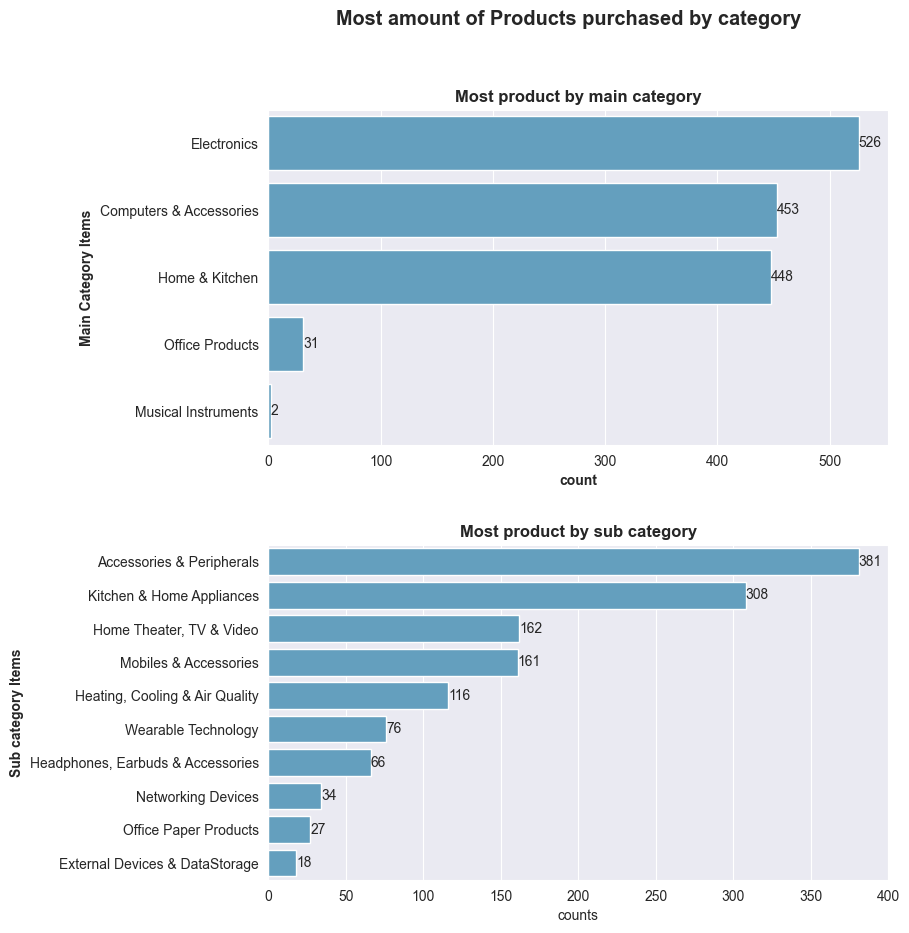

In [80]:
fig,ax=plt.subplots(2,1,figsize=(8,10))
fig.suptitle('Most amount of Products purchased by category',fontweight='heavy',size='x-large')

sns.barplot(ax=ax[0],data=most_main_items,x='counts',y='category_1')
sns.barplot(ax=ax[1],data=most_sub_items,x='counts',y='category_2')

plt.subplots_adjust(hspace=0.3)

ax[0].set_xlabel("count",fontweight='bold')
ax[0].set_ylabel("Main Category Items",fontweight='bold')

ax[1].set_ylabel('count',fontweight='bold')
ax[1].set_ylabel("Sub category Items",fontweight='bold')

ax[0].set_title("Most product by main category",fontweight='bold')
ax[1].set_title("Most product by sub category",fontweight='bold')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/33818423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  disc_exp=sns.barplot(data=df1.sort_values('discounted_price',ascending=False).head(5),x='discounted_price',y='product_name',palette='viridis')


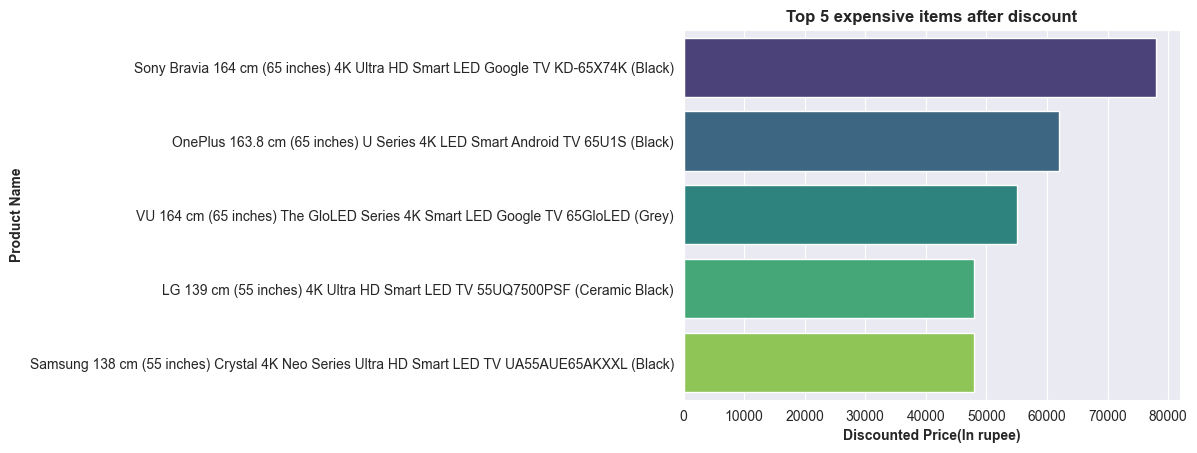

In [82]:
#Top 5 most expensive product after discount
disc_exp=sns.barplot(data=df1.sort_values('discounted_price',ascending=False).head(5),x='discounted_price',y='product_name',palette='viridis')
disc_exp.set_title("Top 5 expensive items after discount",fontweight='bold')
disc_exp.set_xlabel("Discounted Price(In rupee)",fontweight='bold')
disc_exp.set_ylabel("Product Name",fontweight='bold')
plt.show()

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/3906700046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  disc_chp=sns.barplot(data=df1.sort_values('discounted_price',ascending=True).head(5),x='discounted_price',y='product_name',palette='Set2')


Text(0, 0.5, 'product name')

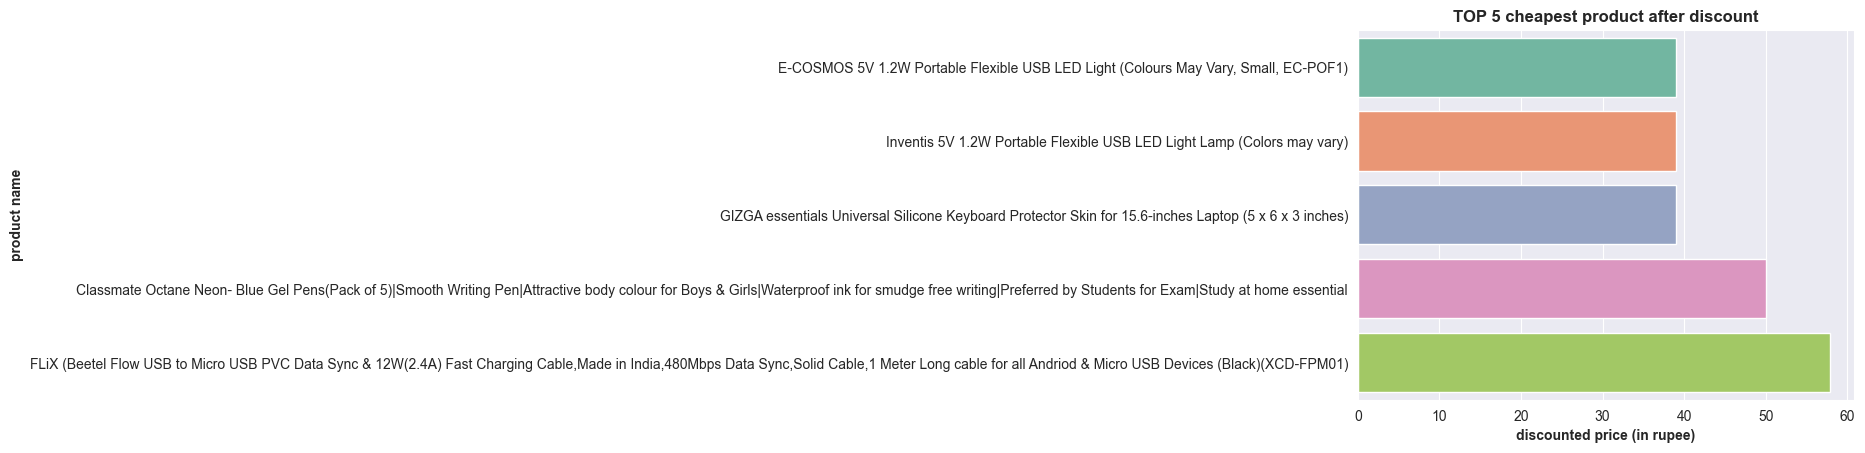

In [84]:
# Top 5 cheapest prodcut after discount
disc_chp=sns.barplot(data=df1.sort_values('discounted_price',ascending=True).head(5),x='discounted_price',y='product_name',palette='Set2')
disc_chp.set_title("TOP 5 cheapest product after discount",fontweight='heavy')
disc_chp.set_xlabel('discounted price (in rupee)',fontweight='bold')
disc_chp.set_ylabel('product name',fontweight='bold')

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/2180737483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  dif_price_large=sns.barplot(data=df1.sort_values('price_difference',ascending=False).head(5),x='price_difference',y='product_name',palette='viridis')


Text(0, 0.5, 'Product Name')

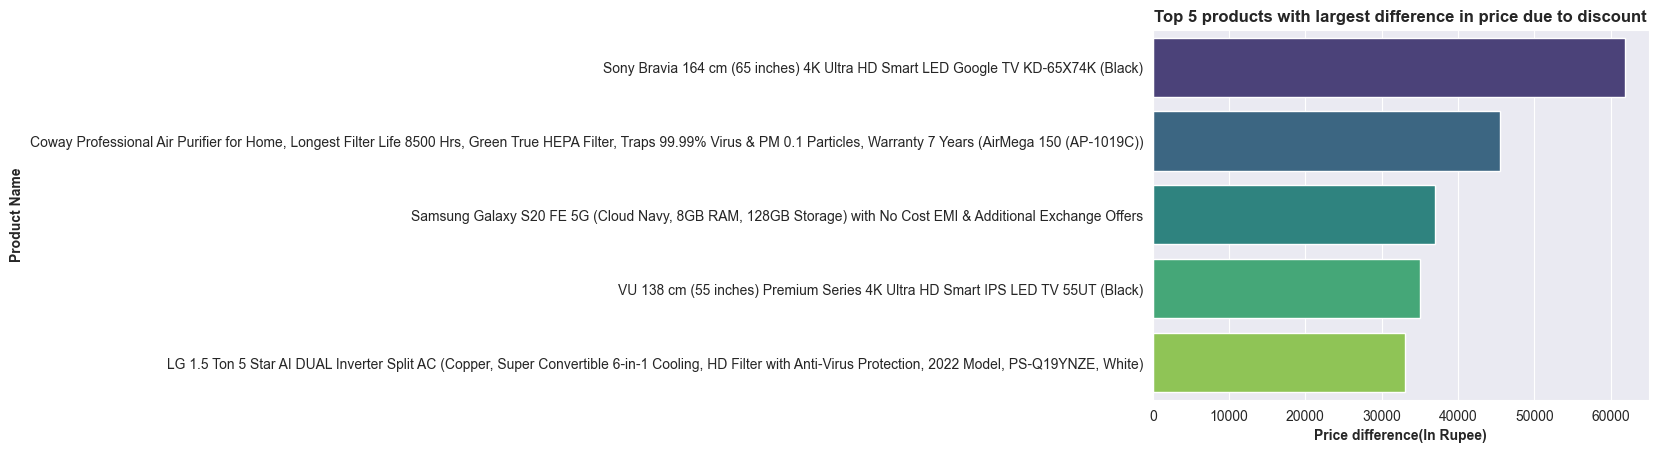

In [86]:
# Top 5 product with largest difference in price due to dicount
dif_price_large=sns.barplot(data=df1.sort_values('price_difference',ascending=False).head(5),x='price_difference',y='product_name',palette='viridis')
dif_price_large.set_title("Top 5 products with largest difference in price due to discount",fontweight='heavy')
dif_price_large.set_xlabel('Price difference(In Rupee)',fontweight='bold')
dif_price_large.set_ylabel('Product Name',fontweight='bold')

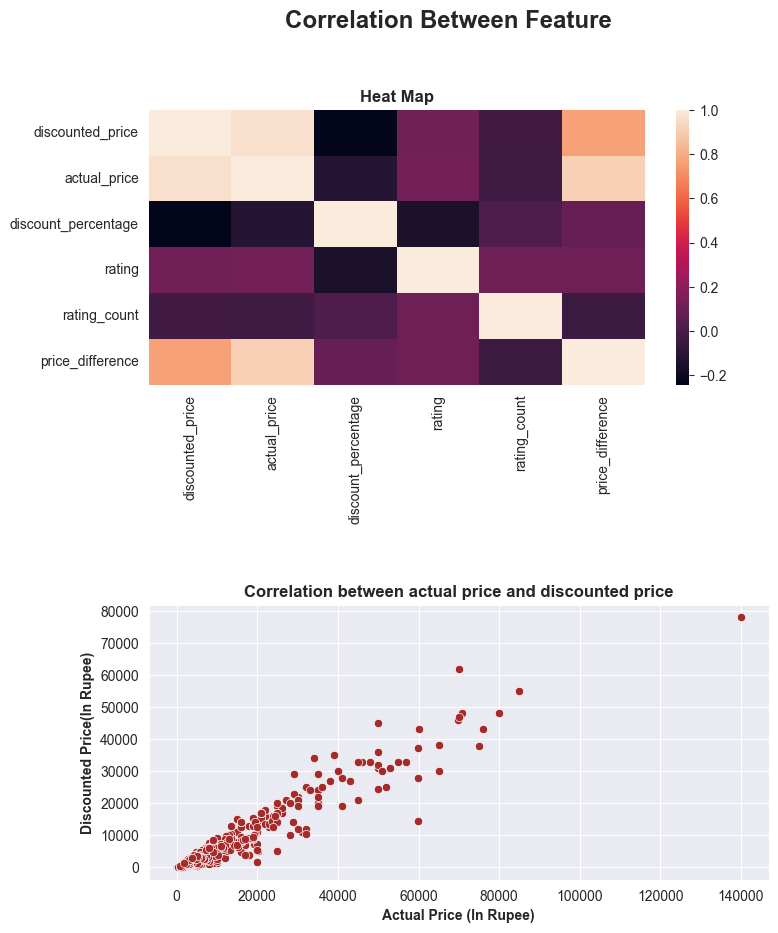

In [66]:
#Observation 2 - correlation between features
#Heatmap and correlation between actal price and discounted price

fig, ax =plt.subplots(2,1,figsize=(8,10))

fig.suptitle('Correlation Between Feature',fontweight='heavy',size='xx-large')

sns.heatmap(ax=ax[0],data=df1.corr(numeric_only=True))
sns.scatterplot(ax=ax[1],data=df1,x='actual_price',y='discounted_price',color='brown')

plt.subplots_adjust(hspace=0.8)

ax[1].set_xlabel("Actual Price (In Rupee)",fontweight='bold')
ax[1].set_ylabel("Discounted Price(In Rupee)",fontweight='bold')

ax[0].set_title("Heat Map",fontweight='heavy')
ax[1].set_title("Correlation between actual price and discounted price",fontweight='heavy')

plt.show()

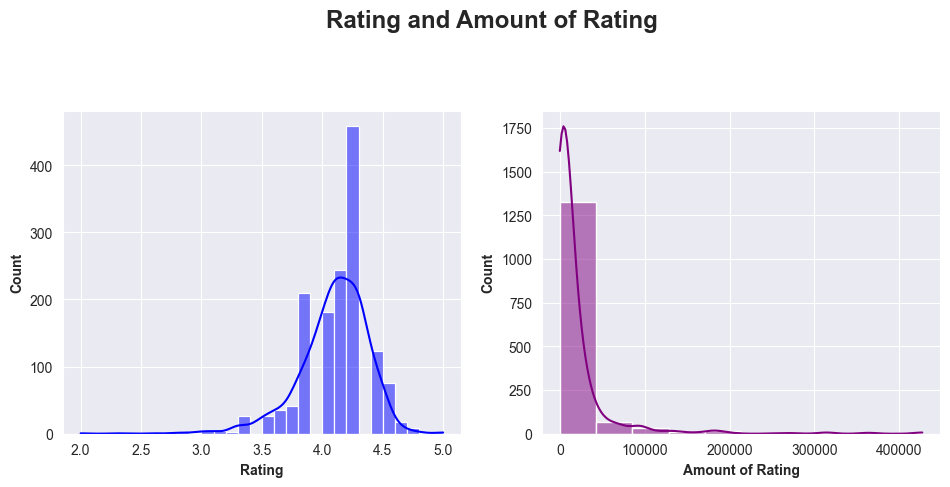

In [67]:
#Observation 3 - Product Rating
#Rating and Amount of rating distribution

fig , ax =plt.subplots(1,2,figsize=(10,5))
plt.suptitle("Rating and Amount of Rating",fontweight='heavy',size='xx-large')
fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0],data=df1,x='rating',bins=30,kde=True,color='blue')
sns.histplot(ax=ax[1],data=df1,x='rating_count',bins=10,kde=True,color='purple')

ax[0].set_xlabel("Rating",fontweight='bold')
ax[0].set_ylabel("Count",fontweight='bold')

ax[1].set_xlabel("Amount of Rating",fontweight='bold')
ax[1].set_ylabel("Count",fontweight='bold')

plt.show()

In [68]:
df1.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_1',
       'category_2', 'ranking_score', 'price_difference'],
      dtype='object')

Text(0, 0.5, 'Product Main Category')

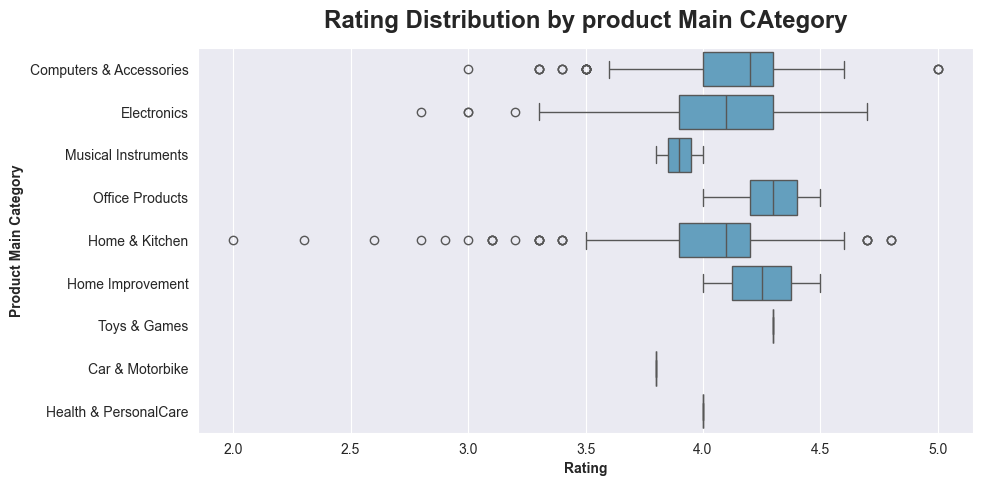

In [69]:
#Rating distribution by product main category
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax,data=df1,x='rating',y='category_1')

ax.set_title("Rating Distribution by product Main CAtegory",fontweight='heavy',size='xx-large',y=1.03)

ax.set_xlabel("Rating",fontweight='bold')
ax.set_ylabel("Product Main Category",fontweight='bold')

In [88]:
#Rating of products based on Ratings

rate_main_cat=df1.groupby(['category_1','ranking_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat=rate_main_cat.rename(columns={'category_1':'Main Category','ranking_score':'Rating Category'})

rate_main_cat

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/396861742.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_main_cat=df1.groupby(['category_1','ranking_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')


,Main Category,Rating Category,Amount
0,Car & Motorbike,Below Average,0
1,Car & Motorbike,Average,1
2,Car & Motorbike,Above Average,0
3,Car & Motorbike,Excellent,0
4,Computers & Accessories,Below Average,0
5,Computers & Accessories,Average,75
6,Computers & Accessories,Above Average,375
7,Computers & Accessories,Excellent,3
8,Electronics,Below Average,1
9,Electronics,Average,132


/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2027/908871396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=df1, x='rating', y='category_2',palette='coolwarm')


Text(0, 0.5, 'Sub Category')

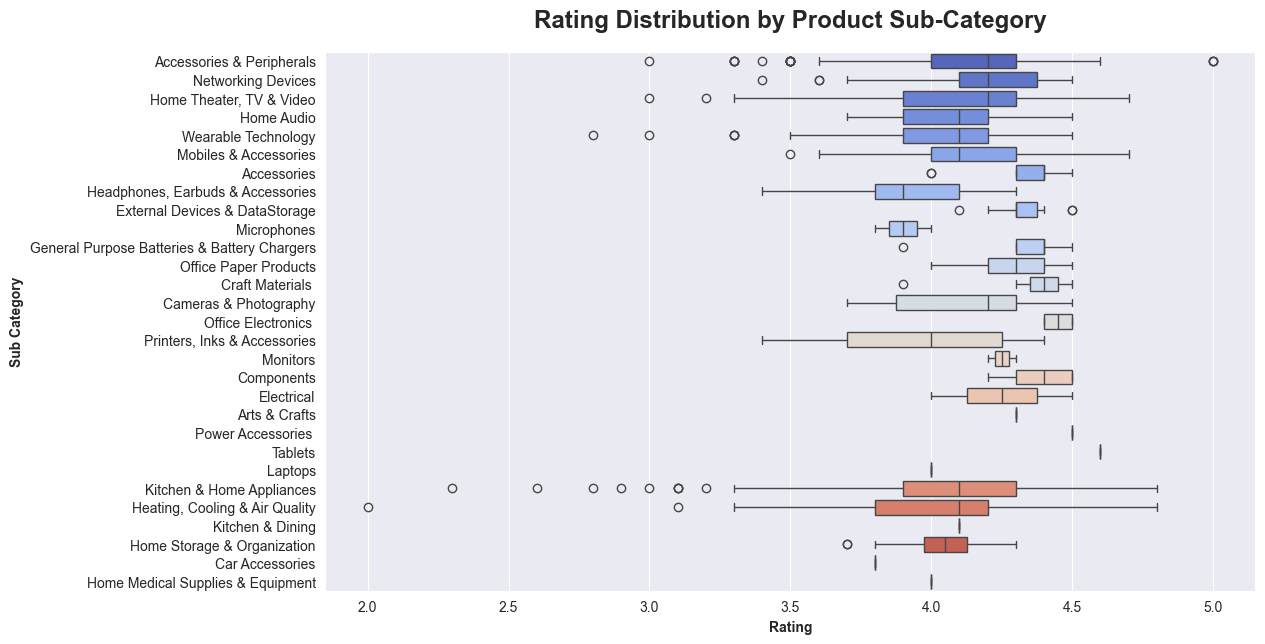

In [71]:
# Rating distribution by product sub-category

fig, ax = plt.subplots(figsize=(12,7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2',palette='coolwarm')
ax.set_title("Rating Distribution by Product Sub-Category",fontweight='heavy',size='xx-large',y=1.03)
ax.set_xlabel("Rating",fontweight='bold')
ax.set_ylabel("Sub Category",fontweight='bold')

In [72]:
df1['ranking_score'].unique()

['Above Average', 'Average', 'Excellent', 'Below Average']
Categories (4, object): ['Below Average' < 'Average' < 'Above Average' < 'Excellent']

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/1077115663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rating_count_plot=sns.barplot(data=rating_count, x='rating', y='counts',order=rating_ordered,palette='magma')


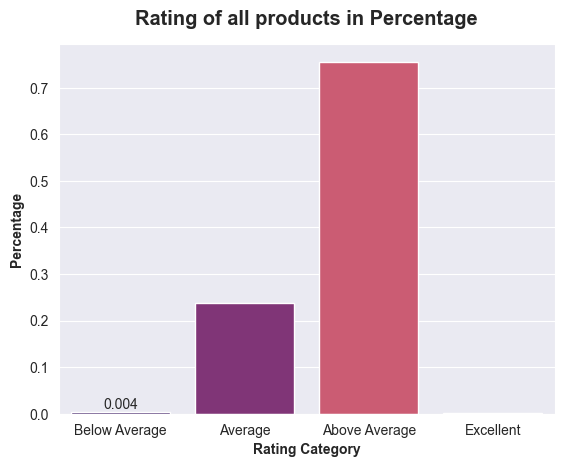

In [90]:
#Rating of all products in percentage

rating_ordered= ['Below Average','Average','Above Average','Excellent']
rating_count=df1['ranking_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count['counts']=rating_count['counts'].round(3)
rating_count_plot=sns.barplot(data=rating_count, x='rating', y='counts',order=rating_ordered,palette='magma')

rating_count_plot.set_xlabel("Rating Category",fontweight='bold')
rating_count_plot.set_ylabel("Percentage",fontweight='bold')
rating_count_plot.set_title("Rating of all products in Percentage",fontweight='heavy',size='x-large',y=1.03)

rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

In [92]:
#Pivot table of rating

def p25(g):
    return np.percentile(g,25)

def p75(g):
    return np.percentile(g,75)

rating_pivot=df1.pivot_table(values=['rating','rating_count'],index=['category_1','category_2'],aggfunc=([p25, np.median, np.mean, p75]))
rating_pivot=rating_pivot.rename(columns={'rating':'Rating','rating_count':'Rating Count','median':'Median', 'mean':'Mean'},index={'category_1':'Main Category','category_2':'Sub Category'})

rating_pivot

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/1433283771.py:9: FutureWarning: The provided callable <function median at 0x121389d00> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  rating_pivot=df1.pivot_table(values=['rating','rating_count'],index=['category_1','category_2'],aggfunc=([p25, np.median, np.mean, p75]))
/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2884/1433283771.py:9: FutureWarning: The provided callable <function mean at 0x12125afc0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  rating_pivot=df1.pivot_table(values=['rating','rating_count'],index=['category_1','category_2'],aggfunc=([p25, np.median, np.mean, p75]))


p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & DataStorage                4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & DataStorage                   19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

In [75]:
#Observation 3 - Reviewers

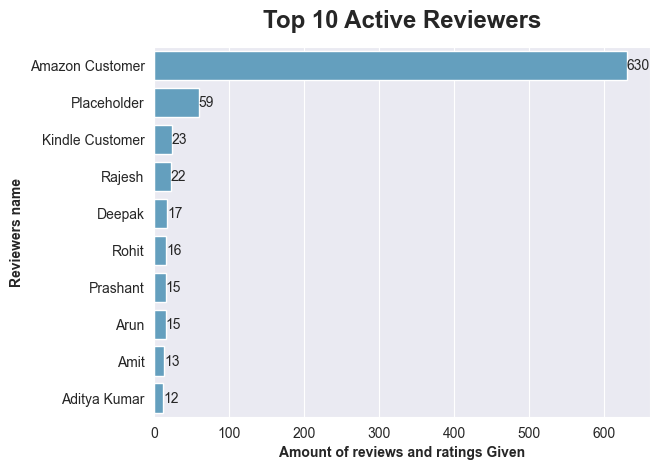

In [94]:
#Reviewers who gave eviews and ratings for more than one product

top_reviewer= data=df2['user_name'].value_counts().head(10).rename_axis("Username").reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer,y='Username',x='counts')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel("Amount of reviews and ratings Given",fontweight='bold')
top_review_plot.set_ylabel("Reviewers name",fontweight='bold')

top_review_plot.set_title("Top 10 Active Reviewers" , fontweight='heavy', size='xx-large',y=1.03)

plt.show()

In [77]:
df1.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_1',
       'category_2', 'ranking_score', 'price_difference'],
      dtype='object')

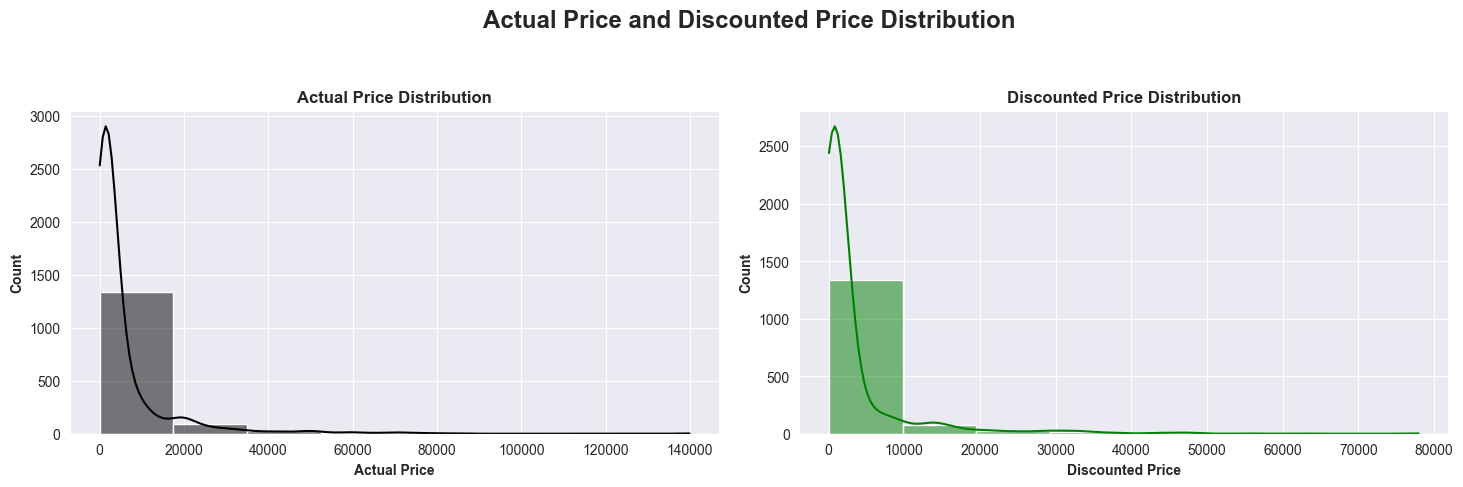

In [78]:
# Observation 4 - Product Price

fig, ax= plt.subplots(1,2,figsize=(15,5))

fig.suptitle("Actual Price and Discounted Price Distribution",fontweight='heavy',size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price',bins=8,kde=True,color='black')
sns.histplot(ax=ax[1], data=df1, x='discounted_price',bins=8,kde=True,color='green')

ax[0].set_xlabel("Actual Price",fontweight='bold')
ax[1].set_xlabel("Discounted Price", fontweight='bold')

ax[0].set_ylabel("Count",fontweight='bold')
ax[1].set_ylabel("Count",fontweight='bold')

ax[0].set_title("Actual Price Distribution",fontweight='bold')
ax[1].set_title("Discounted Price Distribution",fontweight='bold')

plt.show()

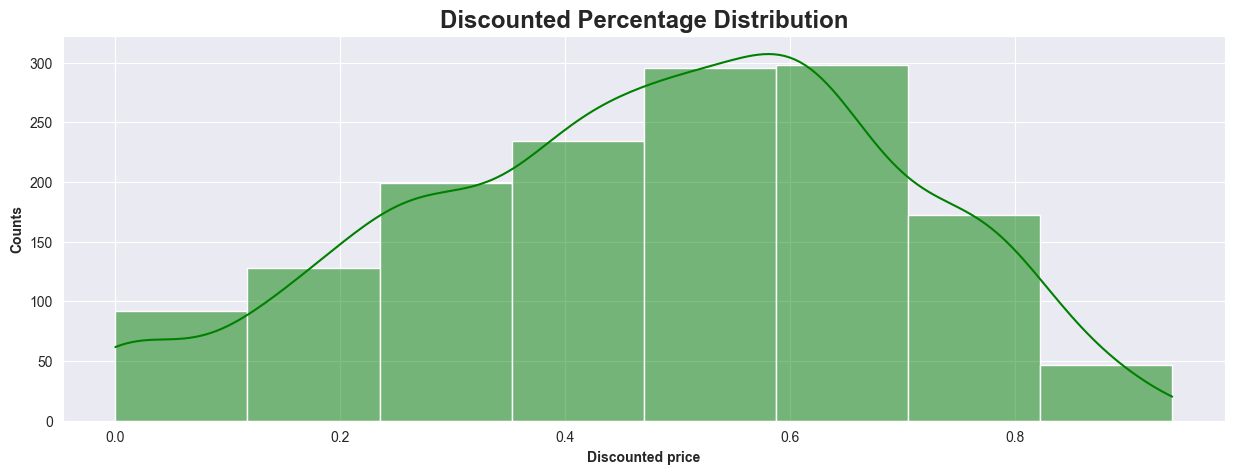

In [79]:
#Discounted Percentage Distribution
fig, ax=plt.subplots(figsize=(15,5))

dis_plot=sns.histplot(data=df1, x='discount_percentage', bins=8,kde=True,color='green')

dis_plot.set_xlabel("Discounted price",fontweight='bold')
dis_plot.set_ylabel("Counts",fontweight='bold')
dis_plot.set_title("Discounted Percentage Distribution",fontweight='heavy', size='xx-large')
plt.show()


In [80]:
df1['discount_percentage'].describe()

count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2027/577112684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='discount_percentage',y='category_1',palette='viridis')


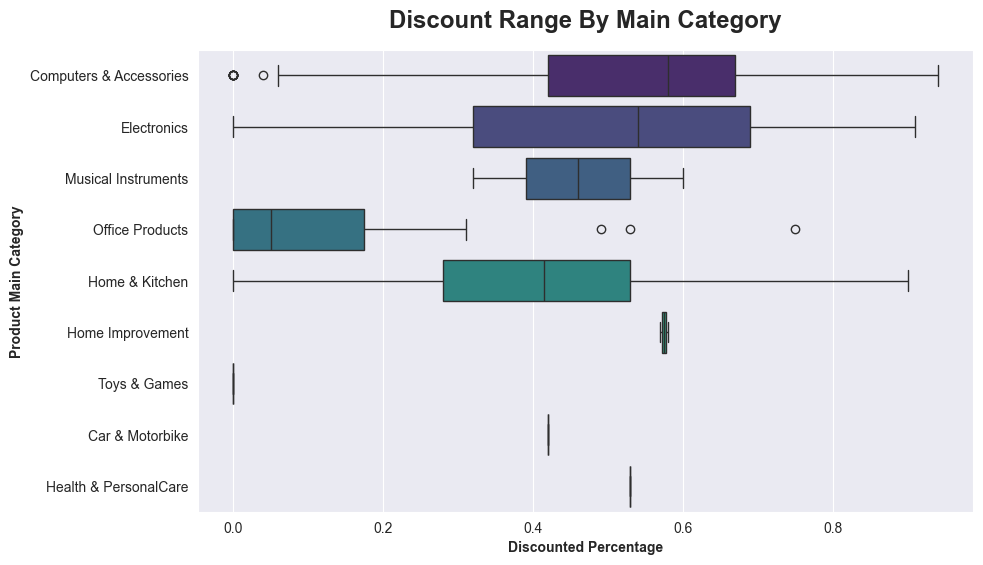

In [81]:
# Discount Range By product Main category
fig, ax= plt.subplots(figsize=(10,6))

sns.boxplot(data=df1, x='discount_percentage',y='category_1',palette='viridis')

ax.set_xlabel("Discounted Percentage",fontweight='bold')
ax.set_ylabel("Product Main Category", fontweight='bold')
ax.set_title("Discount Range By Main Category",fontweight='heavy',size='xx-large', y=1.03)

plt.show()

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2027/1638144152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='discount_percentage', y= 'category_2', palette='magma')


Text(0.5, 1.03, 'Discount Range by Product Sub Category')

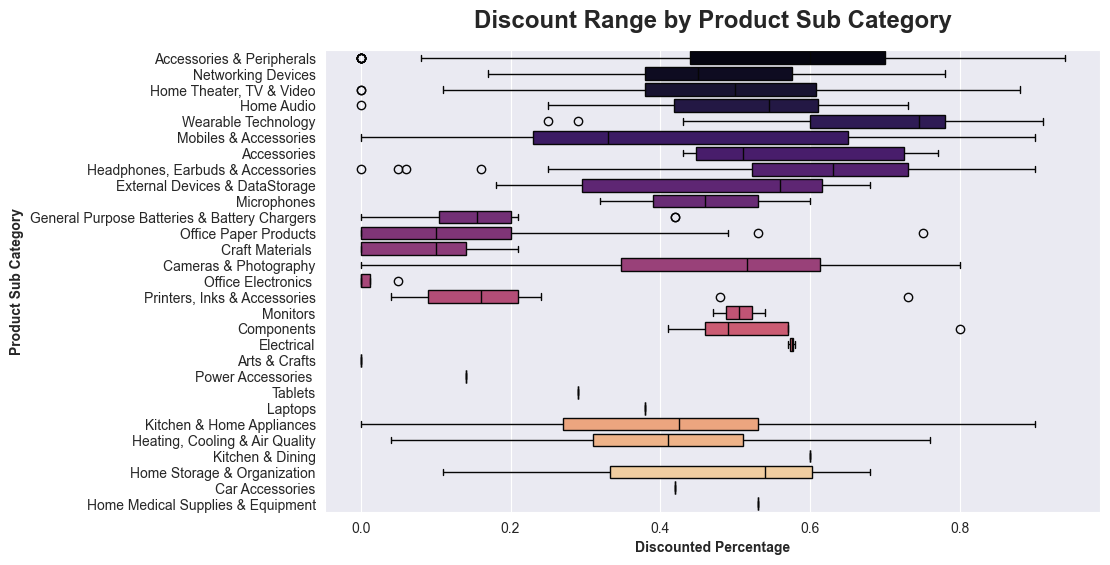

In [82]:
#Discount Range by Product Sub Category

fig, ax= plt.subplots(figsize=(10,6))

sns.boxplot(data=df1, x='discount_percentage', y= 'category_2', palette='magma')

ax.set_xlabel("Discounted Percentage",fontweight='bold')
ax.set_ylabel("Product Sub Category",fontweight='bold')

ax.set_title("Discount Range by Product Sub Category",fontweight='heavy',size='xx-large',y=1.03)

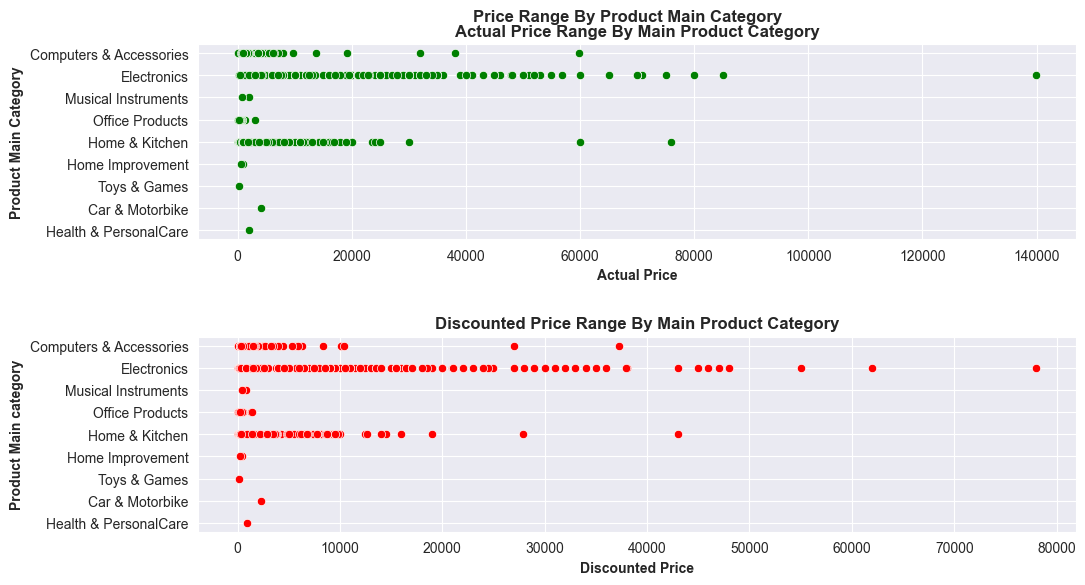

In [83]:
# Actual Price Range & Discounted Product Price Range by Product Main Category
fig, ax = plt.subplots(2,1,figsize=(10,6))

fig.tight_layout(pad=3.0)

fig.suptitle("Price Range By Product Main Category",fontweight='heavy', size='large')


sns.scatterplot(ax=ax[0],data=df1,x='actual_price', y='category_1',color='green')
sns.scatterplot(ax=ax[1],data=df1, x='discounted_price',y='category_1',color='red')

ax[0].set_xlabel("Actual Price",fontweight='bold')
ax[0].set_ylabel("Product Main Category", fontweight='bold')

ax[1].set_xlabel("Discounted Price",fontweight='bold')
ax[1].set_ylabel("Product Main category",fontweight='bold')

ax[0].set_title("Actual Price Range By Main Product Category",fontweight='bold')
ax[1].set_title("Discounted Price Range By Main Product Category", fontweight='bold')

plt.subplots_adjust(hspace=0.5)
plt.show()


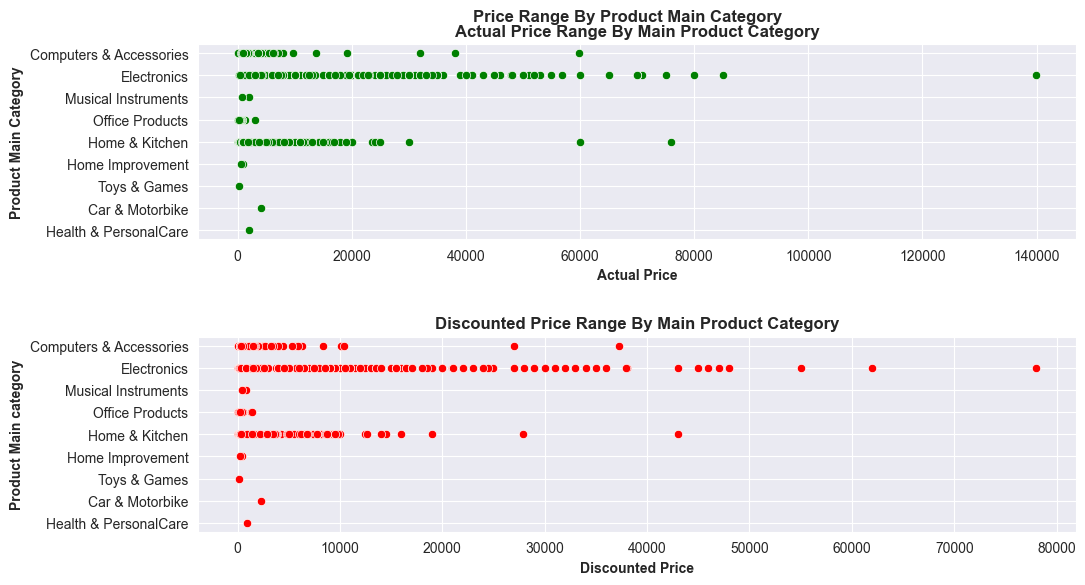

In [84]:
# Actual Price Range & Discounted Product Price Range by Product Main Category
fig, ax = plt.subplots(2,1,figsize=(10,6))

fig.tight_layout(pad=3.0)

fig.suptitle("Price Range By Product Main Category",fontweight='heavy', size='large')


sns.scatterplot(ax=ax[0],data=df1,x='actual_price', y='category_1',color='green')
sns.scatterplot(ax=ax[1],data=df1, x='discounted_price',y='category_1',color='red')

ax[0].set_xlabel("Actual Price",fontweight='bold')
ax[0].set_ylabel("Product Main Category", fontweight='bold')

ax[1].set_xlabel("Discounted Price",fontweight='bold')
ax[1].set_ylabel("Product Main category",fontweight='bold')

ax[0].set_title("Actual Price Range By Main Product Category",fontweight='bold')
ax[1].set_title("Discounted Price Range By Main Product Category", fontweight='bold')

plt.subplots_adjust(hspace=0.5)
plt.show()


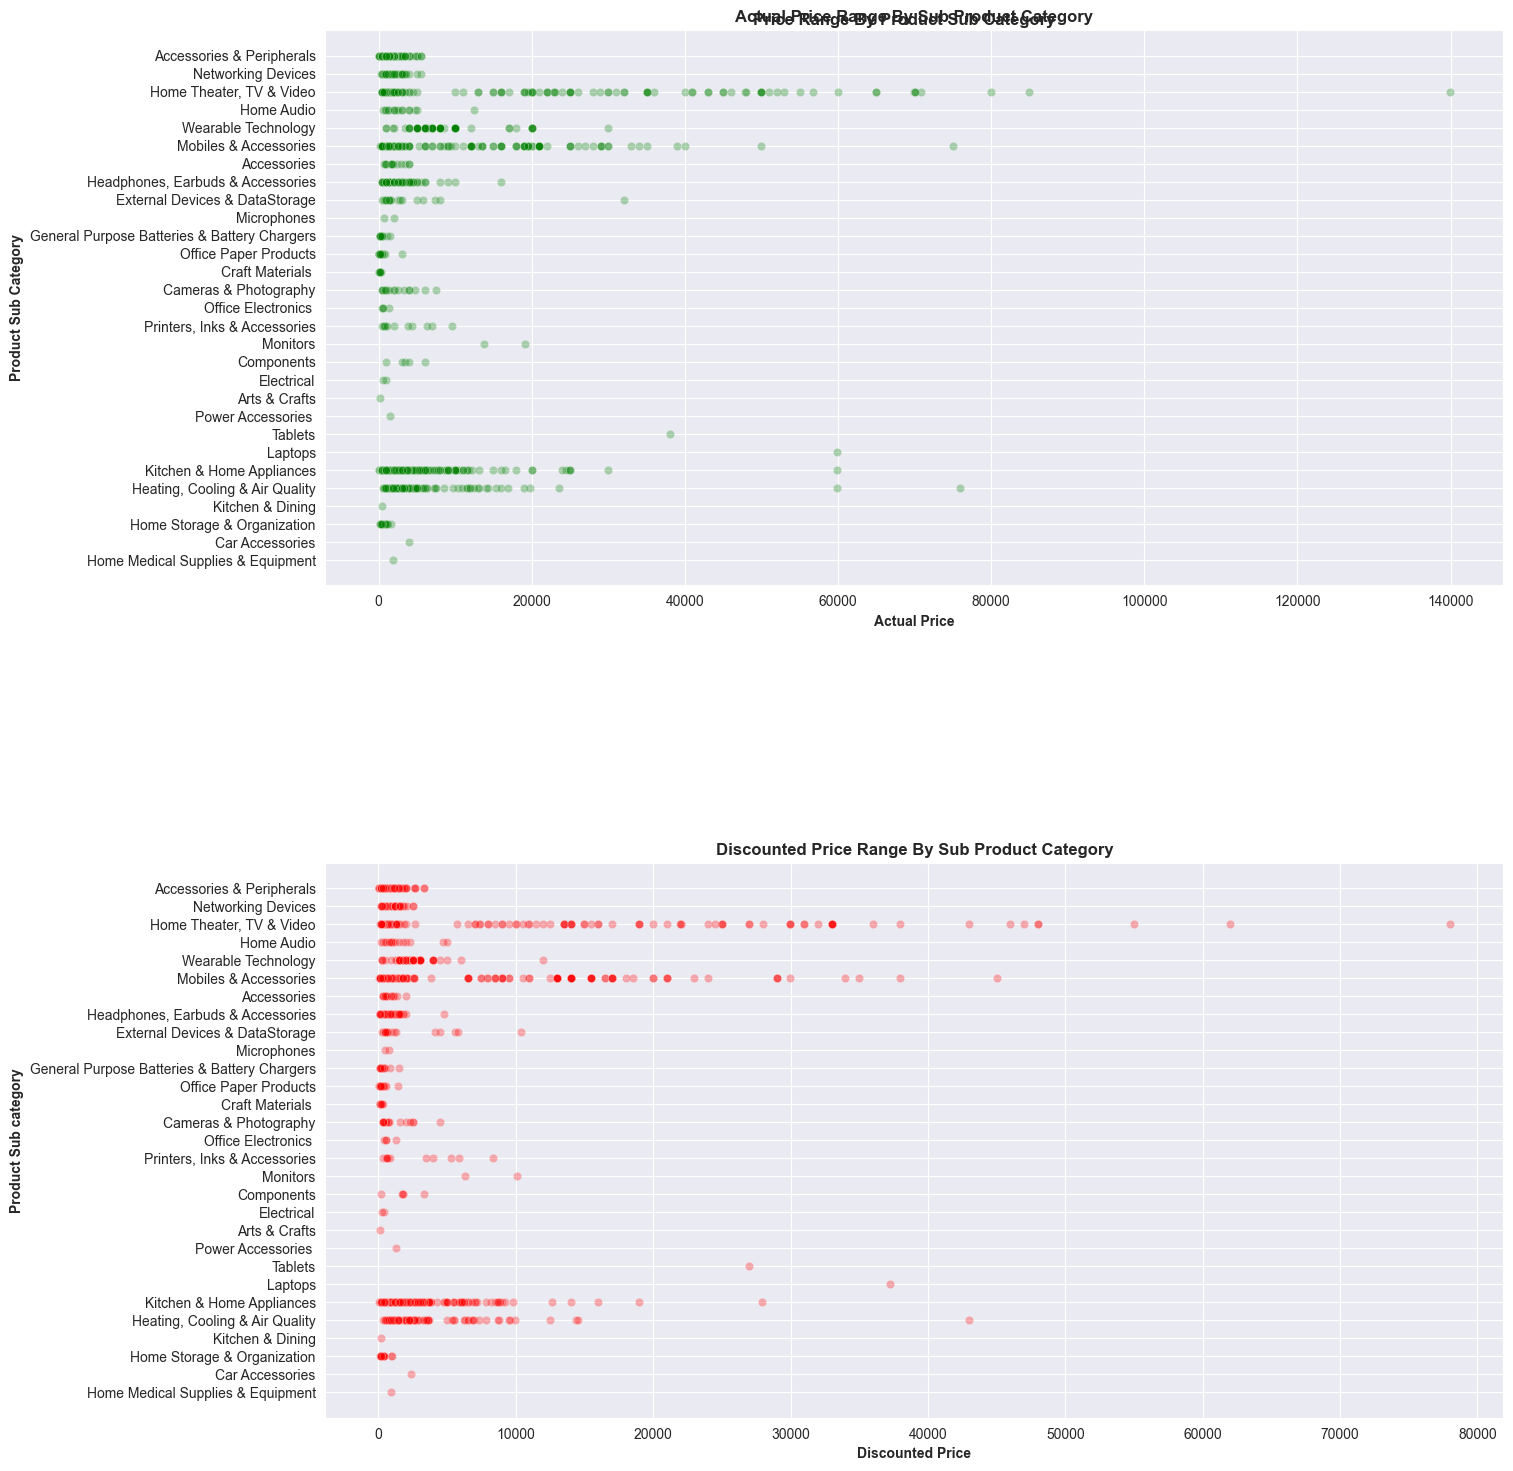

In [85]:
# Actual Price Range & Discounted Product Price Range by Product Sub Category
fig, ax = plt.subplots(2,1,figsize=(13,15))

fig.tight_layout(pad=3.0)

fig.suptitle("Price Range By Product Sub Category",fontweight='heavy', size='large')


sns.scatterplot(ax=ax[0],data=df1,x='actual_price', y='category_2',color='green',alpha=0.3)
sns.scatterplot(ax=ax[1],data=df1, x='discounted_price',y='category_2',color='red',alpha=0.3)

ax[0].set_xlabel("Actual Price",fontweight='bold')
ax[0].set_ylabel("Product Sub Category", fontweight='bold')

ax[1].set_xlabel("Discounted Price",fontweight='bold')
ax[1].set_ylabel("Product Sub category",fontweight='bold')

ax[0].set_title("Actual Price Range By Sub Product Category",fontweight='bold')
ax[1].set_title("Discounted Price Range By Sub Product Category", fontweight='bold')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [86]:
# Pivot Table of prices
def p25(g):
    return np.percentile(g,25)
def p75(g):
    return np.percentile(g,75)

actual_price_pivot=df1.pivot_table(values=['actual_price','discounted_price'],index=['category_1','category_2'],aggfunc=([p25, np.median,np.mean,p75]))

actual_price_pivot

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2027/924767236.py:7: FutureWarning: The provided callable <function median at 0x106961bc0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  actual_price_pivot=df1.pivot_table(values=['actual_price','discounted_price'],index=['category_1','category_2'],aggfunc=([p25, np.median,np.mean,p75]))
/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_2027/924767236.py:7: FutureWarning: The provided callable <function mean at 0x106506de0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  actual_price_pivot=df1.pivot_table(values=['actual_price','discounted_price'],index=['category_1','category_2'],aggfunc=([p25, np.median,np.mean,p75]))


p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & DataStorage                    1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & DataStorage                         504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

In [87]:
#Predicting Discounted Price of Products

In [96]:
#Extracting Independent and Dependent Variable

x=df1.iloc[:,3].values.reshape(-1,1)
y=df1.iloc[:,2].values.reshape(-1,1)

In [98]:
import sklearn
print (sklearn.__version__)

1.6.1


In [100]:
#Splitting the Dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [102]:
#Fitting Simple Linear Regression to Training Set

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [104]:
#Calculating the Coefficients

reg.coef_

array([[0.60066987]])

In [93]:
# Calculating the Intercept

reg.intercept_

array([-167.20433789])

In [106]:
#Calculating the R-Squared Value

from sklearn.metrics import r2_score
pred=reg.predict(X_test)
print("R2 Score:",r2_score(Y_test,pred))

R2 Score: 0.9224573166916075


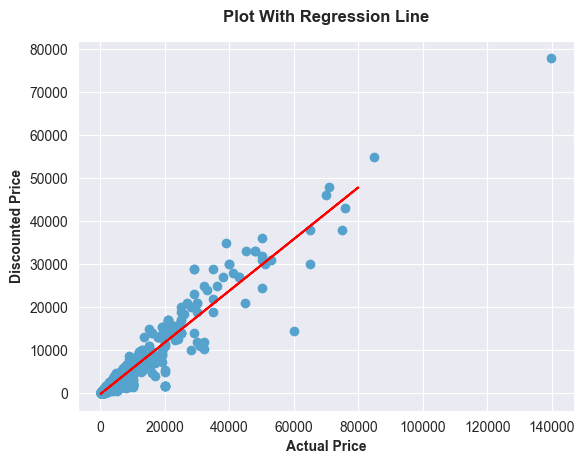

In [95]:
#Scatterplot with Regression Line

plt.scatter(X_train,Y_train)
plt.plot(X_test,pred,color='r')
plt.xlabel("Actual Price",fontweight='bold')
plt.ylabel("Discounted Price",fontweight='bold')
plt.title("Plot With Regression Line",fontweight='heavy',size='large',y=1.03)

plt.show()

In [108]:
#Cross validation result

from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=10,shuffle=True,random_state=21)
cv_results=cross_val_score(reg, x, y, cv=kf)

print("Cross Validation Results Mean:", cv_results.mean())

Cross Validation Results Mean: 0.9159405293663454


In [98]:
df1.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_1',
       'category_2', 'ranking_score', 'price_difference'],
      dtype='object')

In [114]:
#Lasso regression

from sklearn.linear_model import Lasso

X1=df1[['actual_price','rating','rating_count']]
Y1=df1['discounted_price']

X1_train,X1_test,Y1_train,Y1_test= train_test_split(X1,Y1,test_size=0.3,random_state=21)

lasso=Lasso(alpha=0.1)
lasso.fit(X1_train,Y1_train)
ridge_pred=lasso.predict(X1_test)

print("Lasso Score:",lasso.score(X1_test,Y1_test))
print("Lasso Coefficients:", lasso.coef_)

Lasso Score: 0.9239335096300123
Lasso Coefficients: [5.95605560e-01 1.54610535e+02 4.03305120e-04]


In [116]:
#Ridge Regression

from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1)

ridge.fit(X1_train,Y1_train)

ridge_pred= ridge.predict(X1_test)

print("Ridge Score:",ridge.score(X1_test,Y1_test))

Ridge Score: 0.9239325030574681


In [118]:
#Linear Regression with Three Predictors

reg2=LinearRegression()
reg2.fit(X1_train,Y1_train)
pred=reg2.predict(X1_test)

print("R2 Score:",r2_score(pred,Y1_test))

R2 Score: 0.903096674354495


In [120]:
#Applying Preprocessing Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X2= df1[['actual_price','rating','rating_count']]
Y2= df1['discounted_price']

X2= scaler.fit_transform(X2)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.3, random_state=21)

regss = LinearRegression()

regss.fit(X2_train,Y2_train)

pred= regss.predict(X2_test)

print("R2 Score:", r2_score(pred,Y2_test))

R2 Score: 0.9030966743542023


In [103]:
# Evaluating Simple Linear Regression Model

In [122]:
ols_data=df1[['discounted_price','actual_price']]

In [124]:
ols_formula='discounted_price ~ actual_price'

In [126]:
#Importing ols Function

from statsmodels.formula.api import ols

OLS=ols(formula=ols_formula, data=ols_data)

model=OLS.fit()

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:40:50   Log-Likelihood:                -13137.
No. Observations:                1465   AIC:                         2.628e+04
Df Residuals:                    1463   BIC:                         2.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -219.2597     55.486     -3.952      0.000    -328.099    -110.420
actual_price     0.6142      0.005    134.600      0.000       0.605       0.623
==============================================================================
Omnibus:                      521.405   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62749.178
Skew:                          -0.600   Prob(JB):                         0.00
Kurtosis:                      35.040   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#Subset x variable
X_ols=ols_data['actual_price']

#Get Prediction From Model
fitted_values=model.predict(X_ols)

#Calculate Residuals
residuals=model.resid

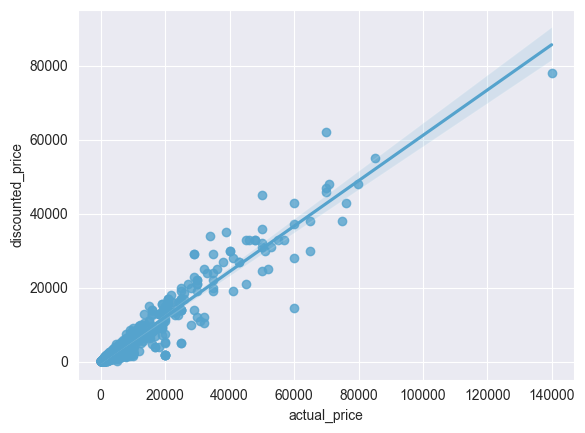

In [132]:
sns.regplot(data=ols_data,x='actual_price',y='discounted_price')
plt.show()

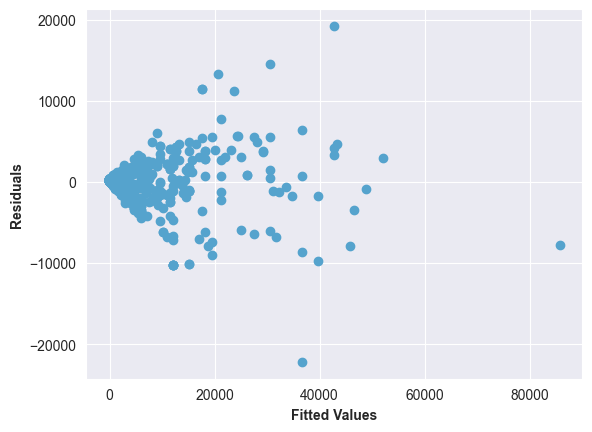

In [110]:
# Checking for Homoscedasticity

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values',fontweight='bold')
plt.ylabel('Residuals',fontweight='bold')
plt.show()

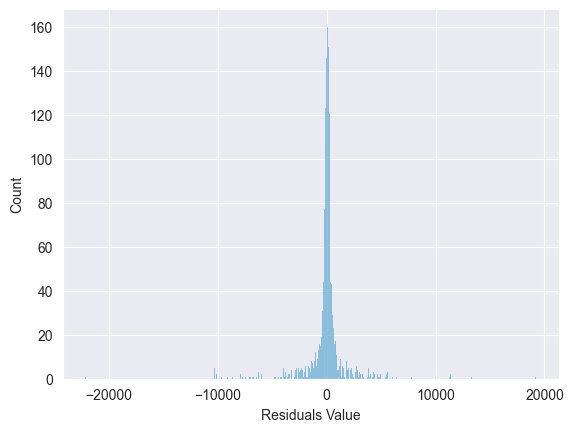

In [134]:
# Checking for Normal Distrubution of Error

ax= sns.histplot(residuals)

ax.set_xlabel("Residuals Value")

plt.show()

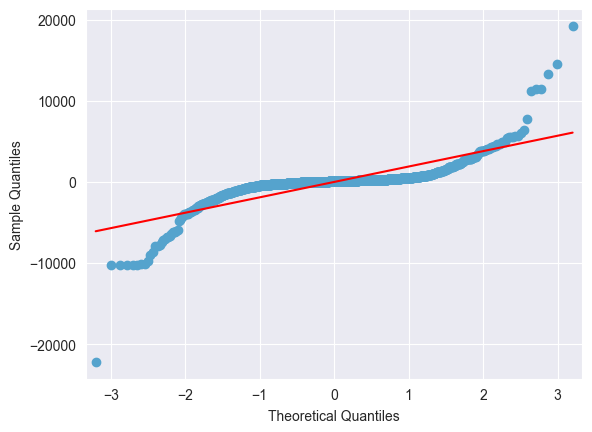

In [136]:
# Quantile - Quantile plot

import statsmodels.api as sm

ax= sm.qqplot(model.resid,line='s')

plt.show()